In [1]:

#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:

#Reading the dataset

dataset = pd.read_csv("Data/mlb_results.csv")


In [3]:
dataset.head()

,Team,Date,WinLoss,HapSen,SadSen,GenSen,PosPol,NeuPol,NegPol,ComPol,YesCog,NoCog
0,CHC,2016-04-11,1,10450,3697,14147,37795,1009,48980,27055,72,69131
1,CHC,2016-04-13,1,9700,3205,12905,36267,975,47186,26090,75,66327
2,CHC,2016-04-14,1,9748,3617,13365,41003,932,52609,29796,97,73681
3,CHC,2016-04-15,0,9169,3142,12311,36518,1017,48456,26654,70,66714
4,CHC,2016-04-16,1,9048,2693,11741,35439,1002,47263,26392,86,63830


In [4]:

dataset.shape



(309, 12)

In [5]:
dataset.isna().sum()



Team       0
Date       0
WinLoss    0
HapSen     0
SadSen     0
GenSen     0
PosPol     0
NeuPol     0
NegPol     0
ComPol     0
YesCog     0
NoCog      0
dtype: int64

In [6]:
dataset.duplicated().any()



False

/opt/conda/envs/v2anaconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/v2anaconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/v2anaconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

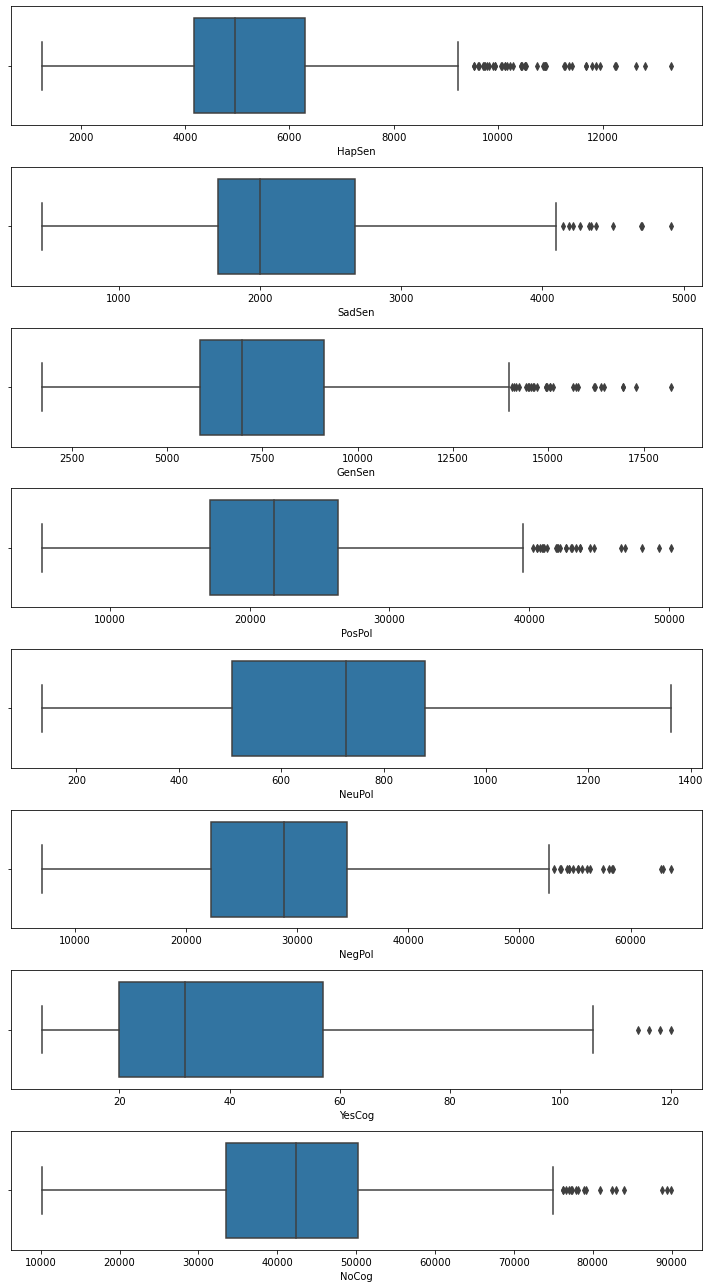

In [8]:




fig, axs = plt.subplots(8, figsize = (10,18))
plt1 = sns.boxplot(dataset['HapSen'], ax = axs[0])
plt2 = sns.boxplot(dataset['SadSen'], ax = axs[1])
plt3 = sns.boxplot(dataset['GenSen'], ax = axs[2])
plt4 = sns.boxplot(dataset['PosPol'], ax = axs[3])
plt5 = sns.boxplot(dataset['NeuPol'], ax = axs[4])
plt6 = sns.boxplot(dataset['NegPol'], ax = axs[5])
plt7 = sns.boxplot(dataset['YesCog'], ax = axs[6])
plt8 = sns.boxplot(dataset['NoCog'], ax = axs[7])

plt.tight_layout()






/opt/conda/envs/v2anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


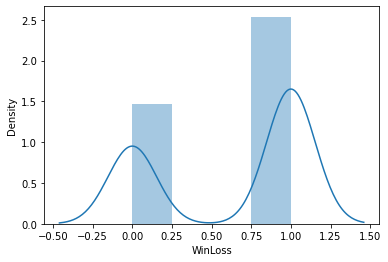

In [9]:


sns.distplot(dataset['WinLoss']);


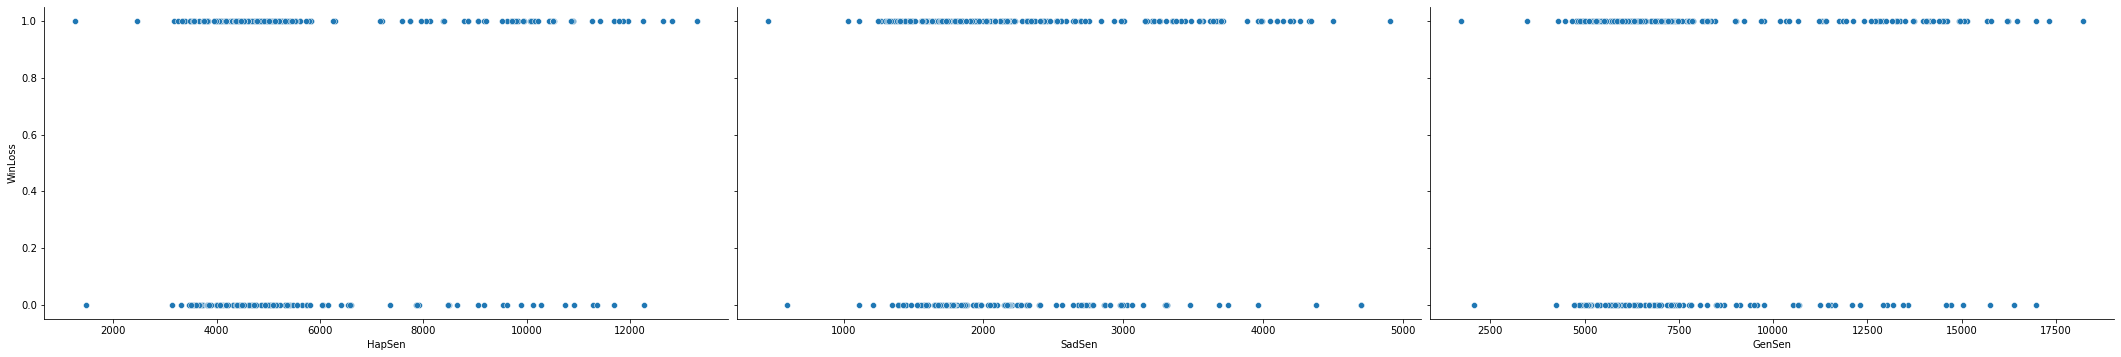

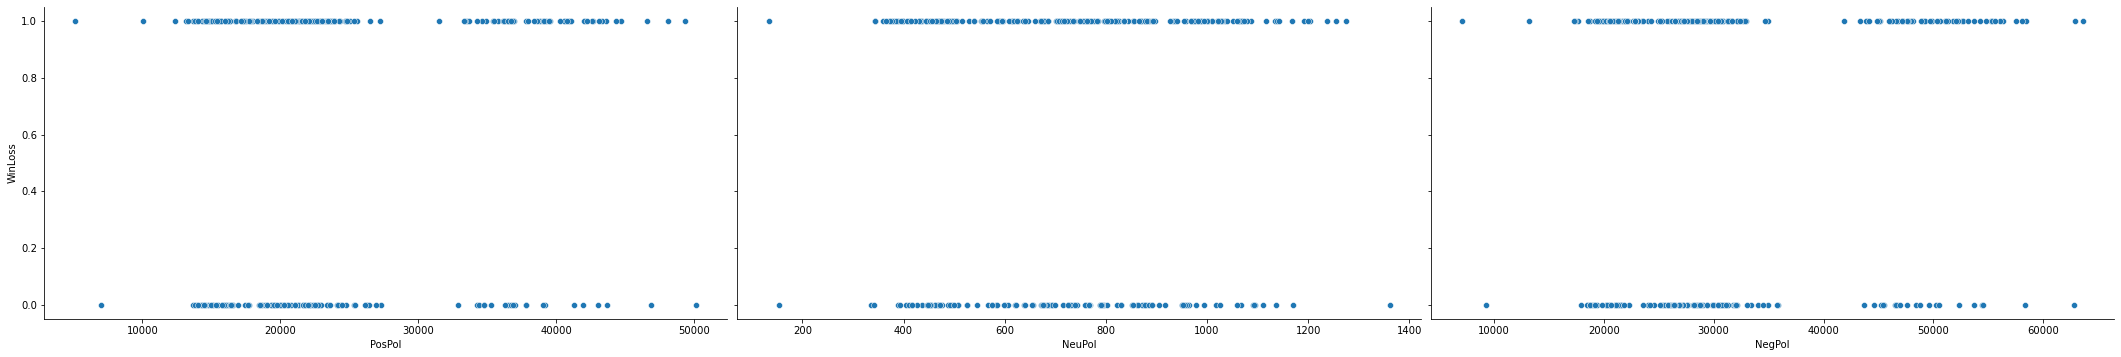

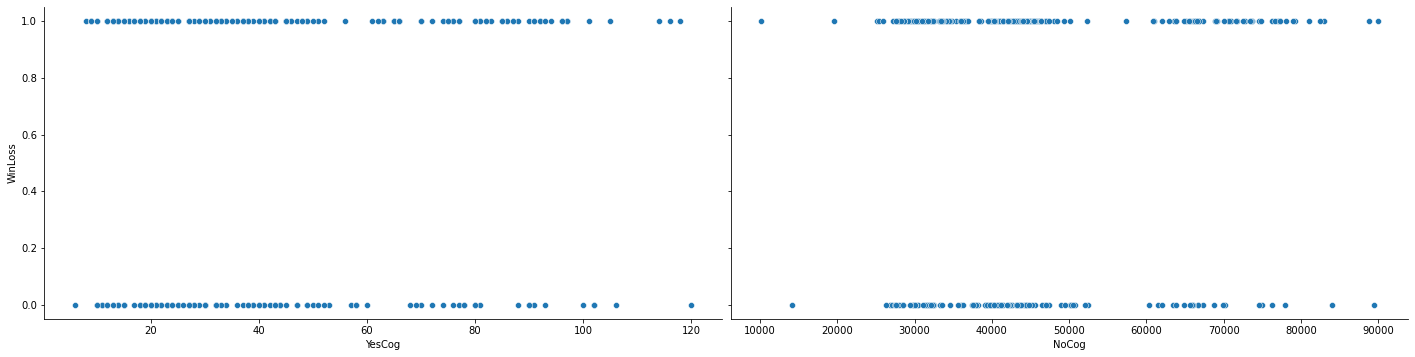

In [11]:



sns.pairplot(dataset, x_vars=['HapSen', 'SadSen', 'GenSen'], y_vars='WinLoss', height=5, aspect=2, kind='scatter')

sns.pairplot(dataset, x_vars=['PosPol', 'NeuPol', 'NegPol'], y_vars='WinLoss', height=5, aspect=2, kind='scatter')

sns.pairplot(dataset, x_vars=['YesCog', 'NoCog'], y_vars='WinLoss', height=5, aspect=2, kind='scatter')

plt.show()



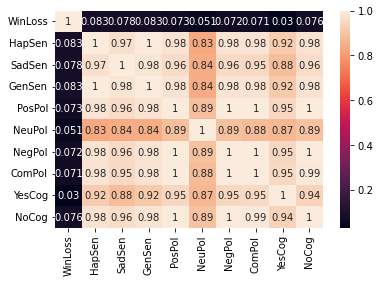

In [12]:





sns.heatmap(dataset.corr(), annot = True)
plt.show()



In [13]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics




In [14]:




#Setting the value for X and Y
x = dataset[['HapSen', 'SadSen', 'GenSen', 'PosPol', 'NeuPol', 'NegPol', 'YesCog', 'NoCog']]
y = dataset['WinLoss']





In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [16]:




mlr= LinearRegression()  
mlr.fit(x_train, y_train) 






LinearRegression()

In [17]:






#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))






0.3623386758806195


[('HapSen', 0.0002123866650156656),
 ('SadSen', -0.0002953985557470158),
 ('GenSen', -8.301189073132198e-05),
 ('PosPol', 5.7747470330881346e-05),
 ('NeuPol', 0.00022176391590233345),
 ('NegPol', -8.414956616303927e-05),
 ('YesCog', -0.008194792201747503),
 ('NoCog', 3.996878141260417e-05)]

In [18]:


#Predicting the Test and Train set result 
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train)  



In [19]:
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [0.486572   0.71389478 0.5961134  0.64643264 0.71486853 0.7625401
 0.56408993 0.54009782 0.64038252 0.60110253 0.65748462 0.76078362
 0.62877909 0.61412495 0.53660177 0.66605889 0.57024725 0.54580073
 0.47904751 0.65198492 0.52800923 0.63496146 0.74424283 0.54346868
 0.69841522 0.54747719 0.54333673 0.64375396 0.65696908 0.78643862
 0.62188707 0.70922379 0.6691626  0.58867019 0.4992579  0.68525234
 0.63421915 0.76940088 0.59814582 0.62175131 0.77262121 0.61691186
 0.50333092 0.69399784 0.51511219 0.75780035 0.72036009 0.63156502
 0.67543083 0.65236975 0.65402532 0.67919878 0.77741453 0.57569415
 0.72943056 0.55476597 0.54262192 0.78255866 0.75659688 0.70123464
 0.66729474 0.60329666 0.78073435 0.5619828  0.56663367 0.68690074
 0.70268528 0.60649992 0.54418411 0.65821039 0.73679484 0.68656734
 0.70282691 0.59921575 0.62360459 0.53748252 0.63232572 0.68750123
 0.56847127 0.78017182 0.79573409 0.55829027 0.60382161 0.55692104
 0.57391365 0.68051368 0.477584   0.56

In [20]:

#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff




,Actual value,Predicted value
75,1,0.486572
7,1,0.713895
292,0,0.596113
56,1,0.646433
164,0,0.714869
...,...,...
166,0,0.740089
264,1,0.637228
85,1,0.698175
31,0,0.751488


In [21]:




#Predict for any value
mlr.predict([[10, 5, 2, 10, 10, 10, 40, 12]])






/opt/conda/envs/v2anaconda/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.03746108])

In [22]:


# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))




R squared value of the model: 2.04


In [23]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.46416007851371277
Mean Square Error: 0.24071947236133703
Root Mean Square Error: 0.49063170745614987


In [24]:


# Calculate P-Values

import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

#diabetes = datasets.load_diabetes()
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
print(result.summary())
#X = diabetes.data
#y = diabetes.target

#X2 = sm.add_constant(X)
#est = sm.OLS(y, X2)
#est2 = est.fit()
#print(est2.summary())



         Current function value: 0.634595
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                WinLoss   No. Observations:                  216
Model:                          Logit   Df Residuals:                      209
Method:                           MLE   Df Model:                            6
Date:                Thu, 01 Sep 2022   Pseudo R-squ.:                 0.03359
Time:                        07:15:55   Log-Likelihood:                -137.07
converged:                      False   LL-Null:                       -141.84
Covariance Type:            nonrobust   LLR p-value:                    0.1460
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
HapSen         0.0169        nan        nan        nan         nan         nan
SadSen         0.0144        nan        nan        nan         na

/opt/conda/envs/v2anaconda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
